# Introduction to Pandas

Tutorial Source: https://datacarpentry.org/python-ecology-lesson/02-starting-with-data.html

### Working with Pandas DataFrames in Python

Pandas = Python Data Analysis Library
- provides data structures
- produces high quality graphs with matplotlib
- works well with NumPy (another python library)

### Reading CSV Data using Pandas

In [3]:
import pandas as pd
surveys_df = pd.read_csv("C:/Users/ondro/Data Science Masters/Python Scripts/data/pandas_practical_-_surveys.csv")
surveys_df

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN
...,...,...,...,...,...,...,...,...,...
35544,35545,12,31,2002,15,AH,NaN,NaN,NaN
35545,35546,12,31,2002,15,AH,NaN,NaN,NaN
35546,35547,12,31,2002,10,RM,F,15.0,14.0
35547,35548,12,31,2002,7,DO,M,36.0,51.0


In [4]:
# the head() method displays the first entries
surveys_df.head() 

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN


In [8]:
# use type() to see the class
type(surveys_df)

pandas.core.frame.DataFrame

In [9]:
# data frames have an attribute dtypes
# this is to find out what kind of data is inside the df
surveys_df.dtypes

record_id            int64
month                int64
day                  int64
year                 int64
plot_id              int64
species_id          object
sex                 object
hindfoot_length    float64
weight             float64
dtype: object

To summarize and access the data stored in dataframes we use **attributes** and **methods**.

Attributes are features of an object. We use the notation **df.attribute**. Other attributes are:
- shape: outputs the size (n of rows and cols)
- columns: outputs names of all colums

Methods are like functions but only work on specific objects. They are called in a similar fashion: **df.method()**

In [12]:
surveys_df.columns
surveys_df.head(2)

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN


In [13]:
# pd.unique function tells us all the unique values
pd.unique(surveys_df['species_id'])

array(['NL', 'DM', 'PF', 'PE', 'DS', 'PP', 'SH', 'OT', 'DO', 'OX', 'SS',
       'OL', 'RM', nan, 'SA', 'PM', 'AH', 'DX', 'AB', 'CB', 'CM', 'CQ',
       'RF', 'PC', 'PG', 'PH', 'PU', 'CV', 'UR', 'UP', 'ZL', 'UL', 'CS',
       'SC', 'BA', 'SF', 'RO', 'AS', 'SO', 'PI', 'ST', 'CU', 'SU', 'RX',
       'PB', 'PL', 'PX', 'CT', 'US'], dtype=object)

In [18]:
site_names = pd.unique(surveys_df['plot_id']) #gives us all the unique values
len(site_names) #counts the number of values stored in site_names

24

In [17]:
# in one step
surveys_df['plot_id'].nunique()
# nunique combines the count and unique value extraction

24

### Groups in Pandas

In [19]:
# We can calculate basic statistics in a column using:
surveys_df['weight'].describe()

count    32283.000000
mean        42.672428
std         36.631259
min          4.000000
25%         20.000000
50%         37.000000
75%         48.000000
max        280.000000
Name: weight, dtype: float64

In [20]:
# Or we can extract one specific metric using:
surveys_df['weight'].min()
surveys_df['weight'].max()
surveys_df['weight'].mean()
surveys_df['weight'].std()
surveys_df['weight'].count()

32283

In [21]:
# We can also group by one or more variables
# Pandas .groupby method
grouped_data = surveys_df.groupby('sex')

# And summarize the group
# Pandas function describe
grouped_data.describe()

record_id                                                               \
        count          mean           std  min      25%      50%       75%   
sex                                                                          
F     15690.0  18036.412046  10423.089000  3.0  8917.50  18075.5  27250.00   
M     17348.0  17754.835601  10132.203323  1.0  8969.75  17727.5  26454.25   

                month            ... hindfoot_length         weight  \
         max    count      mean  ...             75%   max    count   
sex                              ...                                  
F    35547.0  15690.0  6.583047  ...            36.0  64.0  15303.0   
M    35548.0  17348.0  6.392668  ...            36.0  58.0  16879.0   

                                                         
          mean        std  min   25%   50%   75%    max  
sex                                                      
F    42.170555  36.847958  4.0  20.0  34.0  46.0  274.0  
M    42.995379  36.184981  4.0  20.0  39.0  49.0  280.0  

[2 rows x 56 columns]

To count the number of samples for each species we can use groupby and the count() method.

In [22]:
# Count the number of samples by species
species_counts = surveys_df.groupby('species_id')['record_id'].count()
print(species_counts)

species_id
AB      303
AH      437
AS        2
BA       46
CB       50
CM       13
CQ       16
CS        1
CT        1
CU        1
CV        1
DM    10596
DO     3027
DS     2504
DX       40
NL     1252
OL     1006
OT     2249
OX       12
PB     2891
PC       39
PE     1299
PF     1597
PG        8
PH       32
PI        9
PL       36
PM      899
PP     3123
PU        5
PX        6
RF       75
RM     2609
RO        8
RX        2
SA       75
SC        1
SF       43
SH      147
SO       43
SS      248
ST        1
SU        5
UL        4
UP        8
UR       10
US        4
ZL        2
Name: record_id, dtype: int64


In [23]:
# Or count rows that have the species 'DO'
surveys_df.groupby('species_id')['record_id'].count()['DO']

3027

### Plotting Data Using Pandas

<Axes: xlabel='species_id'>

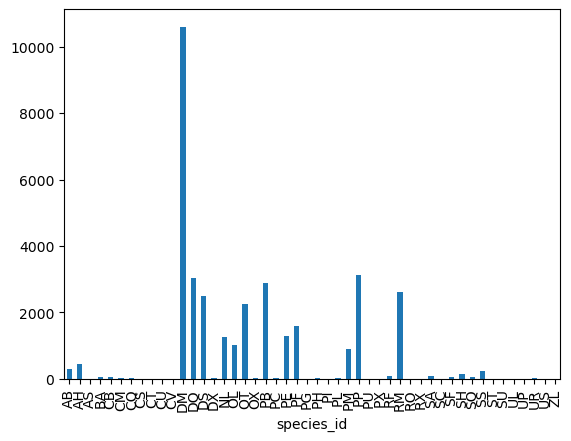

In [25]:
# Make sure figures appear inline in Ipython Notebook
%matplotlib inline
# Create a quick bar chart
species_counts.plot(kind='bar')

<Axes: xlabel='plot_id'>

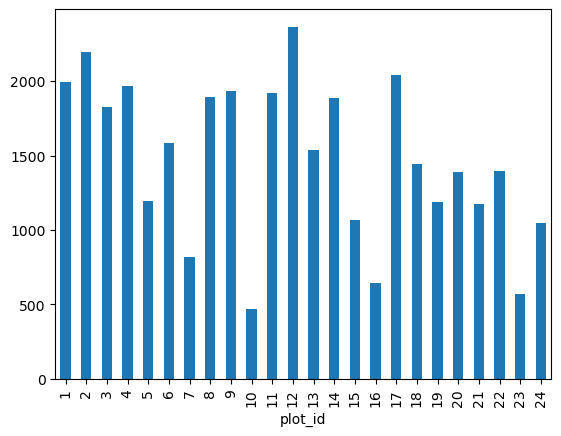

In [26]:
# number of animals captured in each site

total_count = surveys_df.groupby('plot_id')['record_id'].nunique()
total_count.plot(kind='bar')

<Axes: xlabel='plot_id'>

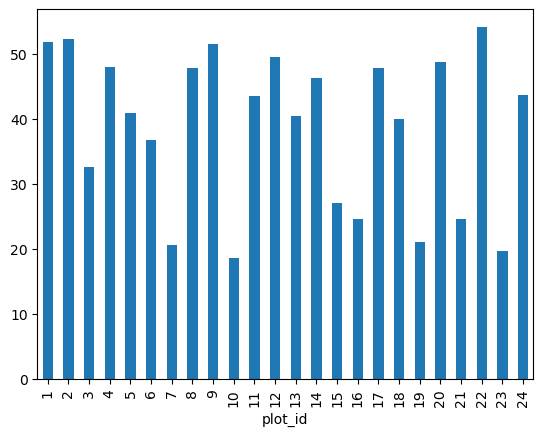

In [27]:
# Create a plot of average weight across all spec per site
mean_weight = surveys_df.groupby('plot_id')['weight'].mean()
mean_weight.plot(kind = 'bar')

<Axes: xlabel='sex'>

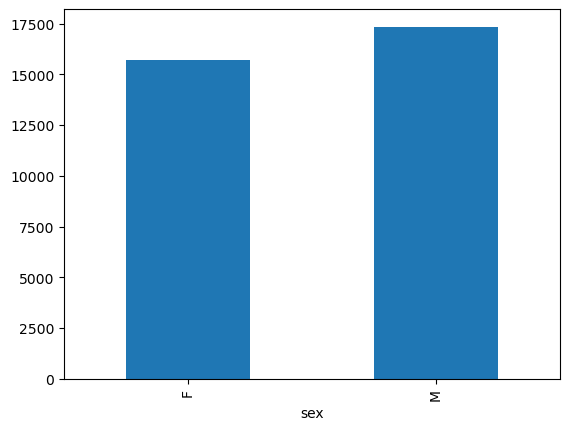

In [36]:
# Create a plot of total males versus total females for the entire dataset
total_gender = surveys_df.groupby('sex').count()['record_id']
total_gender.plot(kind='bar')

Create a stacked bar plot, with weight on the Y axis, and the stacked variable being sex. The plot should show total weight by sex for each site. 

In [44]:
by_sex_by_site = surveys_df.groupby(['plot_id', 'sex'])
site_sex_count = by_sex_by_site['weight'].sum()
site_sex_count

plot_id  sex
1        F      38253.0
         M      59979.0
2        F      50144.0
         M      57250.0
3        F      27251.0
         M      28253.0
4        F      39796.0
         M      49377.0
5        F      21143.0
         M      23326.0
6        F      26210.0
         M      27245.0
7        F       6522.0
         M       6422.0
8        F      37274.0
         M      47755.0
9        F      44128.0
         M      48727.0
10       F       2359.0
         M       2776.0
11       F      34638.0
         M      43106.0
12       F      51825.0
         M      57420.0
13       F      24720.0
         M      30354.0
14       F      32770.0
         M      46469.0
15       F      12455.0
         M      11037.0
16       F       5446.0
         M       6310.0
17       F      42106.0
         M      48082.0
18       F      27353.0
         M      26433.0
19       F      11297.0
         M      11514.0
20       F      33206.0
         M      25988.0
21       F      15481.0
   

In [49]:
unstacked = site_sex_count.unstack()
unstacked

sex,F,M
plot_id,,
1,38253.0,59979.0
2,50144.0,57250.0
3,27251.0,28253.0
4,39796.0,49377.0
5,21143.0,23326.0
6,26210.0,27245.0
7,6522.0,6422.0
8,37274.0,47755.0
9,44128.0,48727.0


Text(0.5, 0, 'Plot ID')

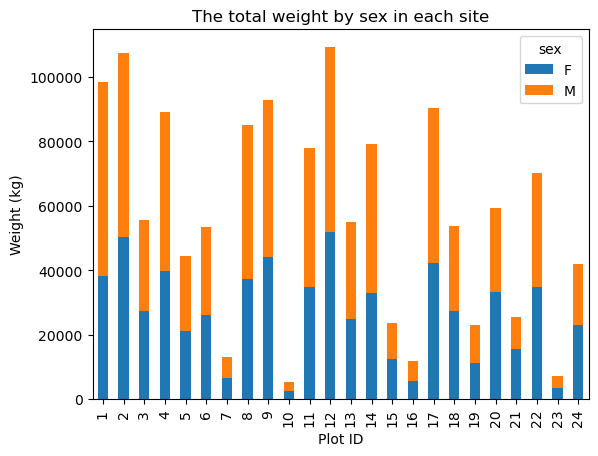

In [51]:
plot = unstacked.plot(kind='bar', stacked=True, title="The total weight by sex in each site")
plot.set_ylabel("Weight (kg)")
plot.set_xlabel("Plot ID")

### Key Takeaways
- Libraries enable us to extend the functionality of Python.
- Pandas is a popular library for working with data.
- A Dataframe is a Pandas data structure that allows one to access data by column (name or index) or row.
- Aggregating data using the groupby() function enables you to generate useful summaries of data quickly.
- Plots can be created from DataFrames or subsets of data that have been generated with groupby().